## Decision Tree

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Download Datasets: Udemy: https://www.superdatascience.com/machine-learning/
dataset=pd.read_csv("./../0. DataSets/Position_Salaries.csv")

dataset.round()
pd.options.display.float_format = '{:,.0f}'.format
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:2].values   #apesar de so apanhar uma coluna, preferivel fazer assim para forcar o X a ser uma matrix e nao um vector
# y = dataset.iloc[:, 2].values
y = dataset.iloc[:, 2:3].values

#we left the "position" column out of the model because it doesn't give us any additional information than the "level" column could give us

In [5]:
# ### Feature scaling
# #como tenho diferentes variaveis com diferentes magnitudes preciso de as normalizar
# #necessario no SVM porque o methodo fit nao tem um feature scaler imbutido

# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# sc_y=StandardScaler()
# X = sc_X.fit_transform(X)

# # y=y.reshape(1, -1)
# y = sc_y.fit_transform(y)


In [6]:
#Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [7]:
#para fazer a previsao tenho que passar o que quero prever para um numpy array e uma matriz
#dps tenho que passar este valor para o scaler em X, faco finalmente a previsao e dps tenho que inverter o scaler em Y


y_pred=regressor.predict(6.5)
y_pred

array([150000.00])

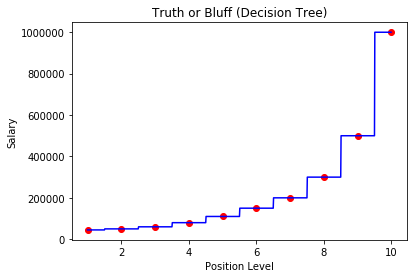

In [10]:
#visualising the Decision Tree regression results

#exactamente o mesmo que o anterior, exactamente a mesma regressao, mas parti o eixo do X em varios Xzinhos equivalentes
#para que o grafico mostrar menos as descontinuidades (porque decision tree nao e liner nem continuo)
X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape(len(X_grid),1)

plt.scatter(X,y,color='red')
plt.plot(X_grid, regressor.predict(X_grid),color='blue')
plt.title("Truth or Bluff (Decision Tree)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
